In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D:\Datasets/airfoil_self_noise.dat', sep='\t', header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns=['Frequency', 'Angle of attack','Chord length','Free-stream velocity','Suction side','Pressure level']

In [5]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,Pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
df.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,Pressure level
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
Angle of attack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
Chord length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
Free-stream velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
Suction side,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
Pressure level,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [9]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)
X

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849
1499,3150,15.6,0.1016,39.6,0.052849
1500,4000,15.6,0.1016,39.6,0.052849
1501,5000,15.6,0.1016,39.6,0.052849


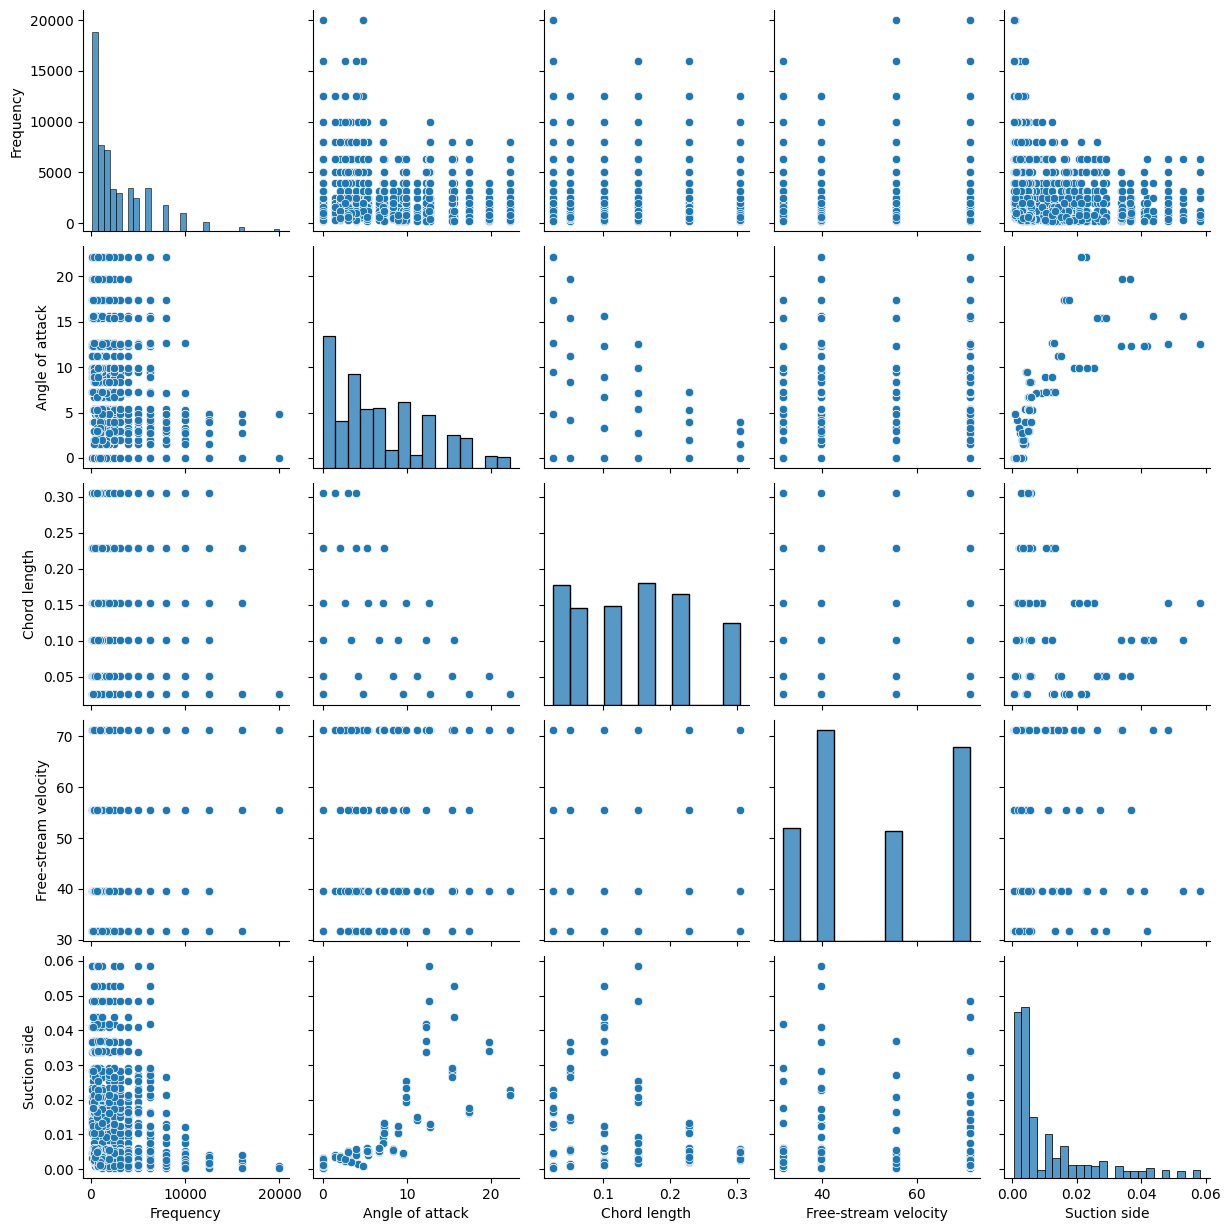

In [41]:
import seaborn as sns
sns.pairplot(X_train)

In [42]:
from sklearn.metrics import r2_score

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
params={
    'max_depth':[2,3,4,5,6,7,8,10,12],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3]
}
rgs = RandomForestRegressor()
model = GridSearchCV(estimator=rgs, param_grid=params)

In [45]:
model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [46]:
model.best_estimator_

RandomForestRegressor(max_depth=12)

In [47]:
y2_pred = model2.predict(X_test)

In [48]:
r2_score(y_test, y2_pred)

0.9696974482275568

In [ ]:
import pickle
pickle.dump(model, open('reg_model', 'wb'))